In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
raw = pd.read_csv('../data/MULTI_att_immigration_parties_round9_raw.csv')

In [4]:
countries = ['DE','FR','IT','PL','HU']

In [5]:
raw = raw[raw['cntry'].isin(countries)].drop(columns='Unnamed: 11').reset_index(drop=True)

In [6]:
cols = {'essround':'round',
        'cntry':'country',
        'prtvede1':'party_de',
        'prtvtdfr':'party_fr', 
        'prtvtfhu':'party_hu', 
        'prtvtcit':'party_it', 
        'prtvtdpl':'party_pl', 
        'imbgeco':'g_b_eco',
        'imueclt':'u_e_cul',
        'imwbcnt':'b_w_cou'}

In [7]:
df = raw.rename(columns=cols)

In [8]:
df.head()

,round,idno,country,party_de,party_fr,party_hu,party_it,party_pl,g_b_eco,u_e_cul,b_w_cou
0,9,1,DE,4.0,NaN,NaN,NaN,NaN,8,8,8
1,9,63,DE,66.0,NaN,NaN,NaN,NaN,5,7,7
2,9,108,DE,66.0,NaN,NaN,NaN,NaN,3,2,3
3,9,117,DE,1.0,NaN,NaN,NaN,NaN,6,7,5
4,9,134,DE,1.0,NaN,NaN,NaN,NaN,8,5,5


### Now we slice our df and create different subsets for each country
#### DE

In [9]:
de=df[df['country']=='DE'].drop(columns=['party_fr','party_hu','party_it','party_pl']).reset_index(drop=True)

In [10]:
de.shape

(2358, 7)

##### In order to falicitate our analysis on the level of trust in the institutions, I´m gonna drop all the rows where respondents answered with 77(refusal), 88(don´t know), 99(no answer)

In [11]:
de = de[(~de['g_b_eco'].isin([77,88,99]))
      &(~de['u_e_cul'].isin([77,88,99]))
      &(~de['b_w_cou'].isin([77,88,99]))]

In [12]:
de.shape

(2302, 7)

In [13]:
de.head()

,round,idno,country,party_de,g_b_eco,u_e_cul,b_w_cou
0,9,1,DE,4.0,8,8,8
1,9,63,DE,66.0,5,7,7
2,9,108,DE,66.0,3,2,3
3,9,117,DE,1.0,6,7,5
4,9,134,DE,1.0,8,5,5


In [14]:
#### Now we divide again our df in 3: 
#### de_f: those who voted for AfD (party==6)  or NPD(party==8)
#### de_novot: those who didn´t vote (party == 66)
#### de_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [15]:
de_f = de[de["party_de"].isin([6,8])]

In [16]:
de_novot = de[de['party_de'] == 66]

In [17]:
de_nof = de[~de['party_de'].isin([6,8,66,77,88])]

#### FR

In [18]:
fr=df[df['country']=='FR'].drop(columns=['party_de','party_hu','party_it','party_pl']).reset_index(drop=True)

In [19]:
fr.shape

(2010, 7)

In [20]:
fr = fr[(~fr['g_b_eco'].isin([77,88,99]))
      &(~fr['u_e_cul'].isin([77,88,99]))
      &(~fr['b_w_cou'].isin([77,88,99]))]

In [21]:
fr.shape

(1910, 7)

In [22]:
fr.head()

,round,idno,country,party_fr,g_b_eco,u_e_cul,b_w_cou
0,9,13,FR,88.0,10,7,5
1,9,26,FR,66.0,8,9,7
2,9,28,FR,7.0,5,4,2
3,9,39,FR,9.0,6,8,5
4,9,59,FR,66.0,5,0,5


In [23]:
#### fr_f: those who voted for FN (party==11)  
#### fr_novot: those who didn´t vote (party == 66)
#### fr_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [24]:
fr_f = fr[fr["party_fr"] == 11]

In [25]:
fr_novot = fr[fr["party_fr"] == 66]

In [26]:
fr_nof = fr[~fr["party_fr"].isin([11,66,77,88])]

#### IT

In [27]:
it=df[df['country']=='IT'].drop(columns=['party_de','party_hu','party_fr','party_pl']).reset_index(drop=True)

In [28]:
it.shape

(2745, 7)

In [29]:
it = it[(~it['g_b_eco'].isin([77,88,99]))
      &(~it['u_e_cul'].isin([77,88,99]))
      &(~it['b_w_cou'].isin([77,88,99]))]

In [30]:
it.shape

(2566, 7)

In [31]:
it.head()

,round,idno,country,party_it,g_b_eco,u_e_cul,b_w_cou
0,9,5,IT,7.0,7,8,8
1,9,11,IT,8.0,1,0,0
2,9,15,IT,14.0,0,0,0
3,9,41,IT,66.0,8,8,8
4,9,46,IT,66.0,4,3,2


In [32]:
#### it_f: those who voted for Lega (party==9)  
#### it_novot: those who didn´t vote (party == 66)
#### it_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [33]:
it_f = it[it["party_it"] == 9]

In [34]:
it_novot = it[it["party_it"] == 66]

In [35]:
it_nof = it[~it["party_it"].isin([6,66,77,88])]

#### PL

In [36]:
pl=df[df['country']=='PL'].drop(columns=['party_de','party_hu','party_fr','party_it']).reset_index(drop=True)

In [37]:
pl.shape

(1500, 7)

In [38]:
pl = pl[(~pl['g_b_eco'].isin([77,88,99]))
      &(~pl['u_e_cul'].isin([77,88,99]))
      &(~pl['b_w_cou'].isin([77,88,99]))]

In [39]:
pl.shape

(1271, 7)

In [40]:
#### pl_f: those who voted for PiS (party==6)  
#### pl_novot: those who didn´t vote (party == 66)
#### pl_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [41]:
pl_f = pl[pl["party_pl"] == 6]

In [42]:
pl_novot = pl[pl["party_pl"] == 66]

In [43]:
pl_nof = pl[~pl["party_pl"].isin([6,66,77,88])]

#### HU

In [44]:
hu=df[df['country']=='HU'].drop(columns=['party_de','party_pl','party_fr','party_it']).reset_index(drop=True)

In [45]:
hu.shape

(1698, 7)

In [46]:
hu = hu[(~hu['g_b_eco'].isin([77,88,99]))
      &(~hu['u_e_cul'].isin([77,88,99]))
      &(~hu['b_w_cou'].isin([77,88,99]))]

In [47]:
hu.shape

(1488, 7)

In [48]:
#### hu_f: those who voted for Fidesz (party==3)  
#### hu_novot: those who didn´t vote (party == 66)
#### hu_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [49]:
hu_f = hu[hu["party_hu"] == 3]

In [50]:
hu_novot = hu[hu["party_hu"] == 66]

In [51]:
hu_nof = hu[~hu["party_hu"].isin([3,66,77,88])]

### ANALYSIS

### g_b_eco: Immigration bad or good for country´s economy 
##### 0 (bad) - 10 (good)

#### DE

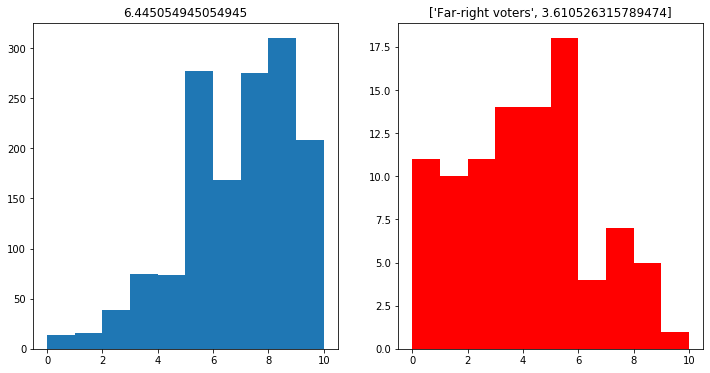

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_nof['g_b_eco']);
axes[1].hist(de_f['g_b_eco'], color='r');
axes[0].set_title(de_nof['g_b_eco'].mean())
axes[1].set_title(['Far-right voters', de_f['g_b_eco'].mean()]);

#### FR

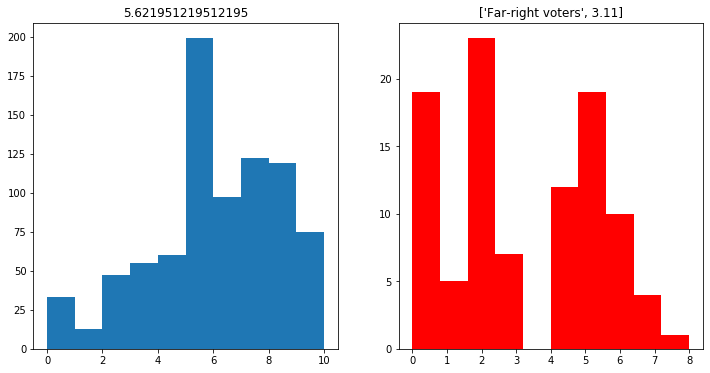

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_nof['g_b_eco']);
axes[1].hist(fr_f['g_b_eco'], color='r');
axes[0].set_title(fr_nof['g_b_eco'].mean())
axes[1].set_title(['Far-right voters', fr_f['g_b_eco'].mean()]);

#### IT

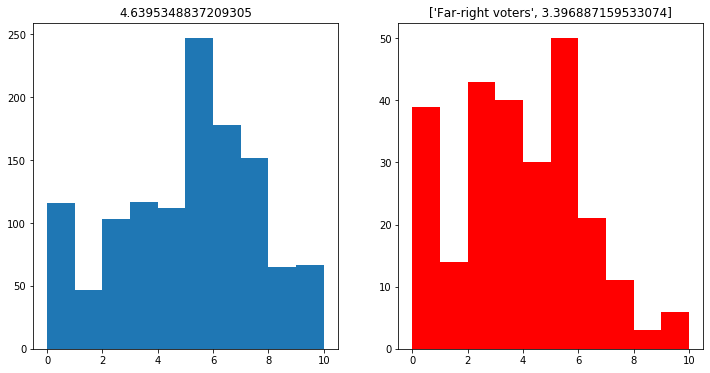

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_nof['g_b_eco']);
axes[1].hist(it_f['g_b_eco'], color='r');
axes[0].set_title(it_nof['g_b_eco'].mean())
axes[1].set_title(['Far-right voters', it_f['g_b_eco'].mean()]);

#### PL

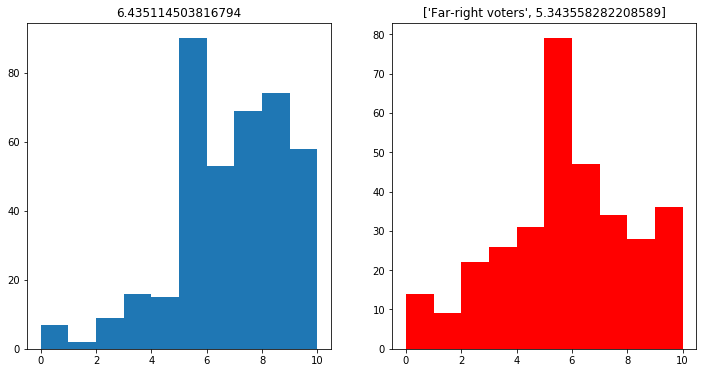

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nof['g_b_eco']);
axes[1].hist(pl_f['g_b_eco'], color='r');
axes[0].set_title(pl_nof['g_b_eco'].mean())
axes[1].set_title(['Far-right voters', pl_f['g_b_eco'].mean()]);

#### HU

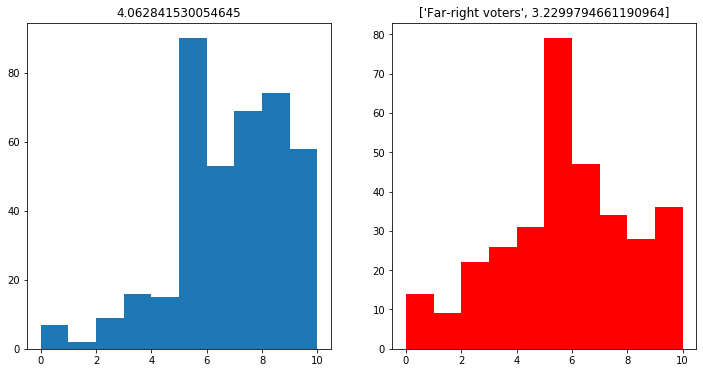

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nof['g_b_eco']);
axes[1].hist(pl_f['g_b_eco'], color='r');
axes[0].set_title(hu_nof['g_b_eco'].mean())
axes[1].set_title(['Far-right voters', hu_f['g_b_eco'].mean()]);

### u_e_cul: Country´s cultural life undermined or enriched by immigrants
##### 0 (undermined) - 10 (enriched)
#### DE

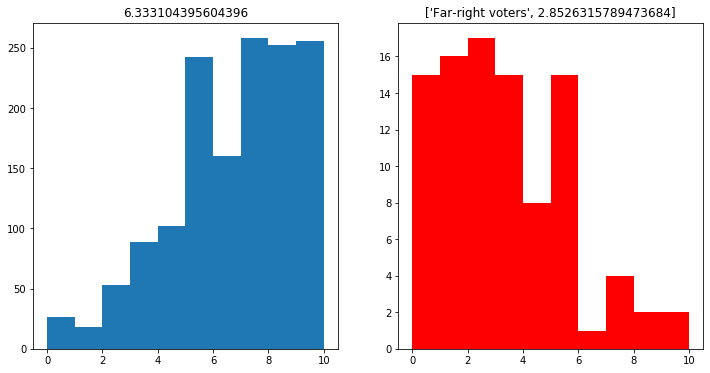

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_nof['u_e_cul']);
axes[1].hist(de_f['u_e_cul'], color='r');
axes[0].set_title(de_nof['u_e_cul'].mean());
axes[1].set_title(['Far-right voters', de_f['u_e_cul'].mean()]);

#### FR

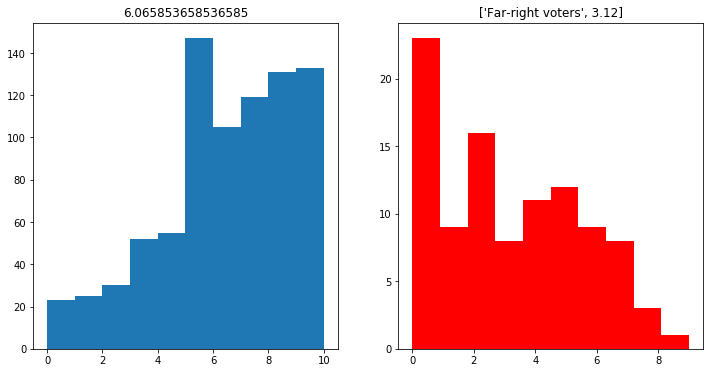

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_nof['u_e_cul']);
axes[1].hist(fr_f['u_e_cul'], color='r');
axes[0].set_title(fr_nof['u_e_cul'].mean());
axes[1].set_title(['Far-right voters', fr_f['u_e_cul'].mean()]);

#### IT

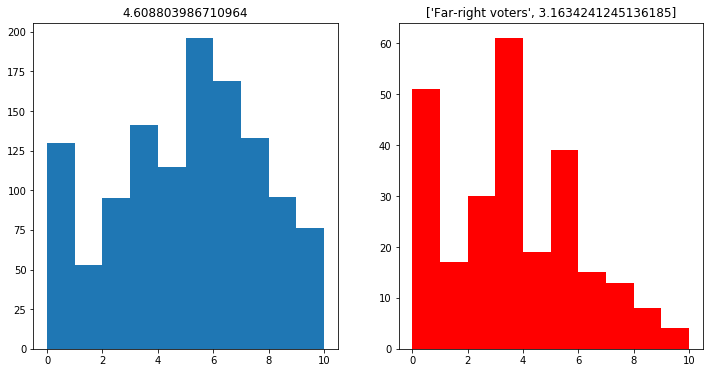

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_nof['u_e_cul']);
axes[1].hist(it_f['u_e_cul'], color='r');
axes[0].set_title(it_nof['u_e_cul'].mean());
axes[1].set_title(['Far-right voters', it_f['u_e_cul'].mean()]);

#### PL

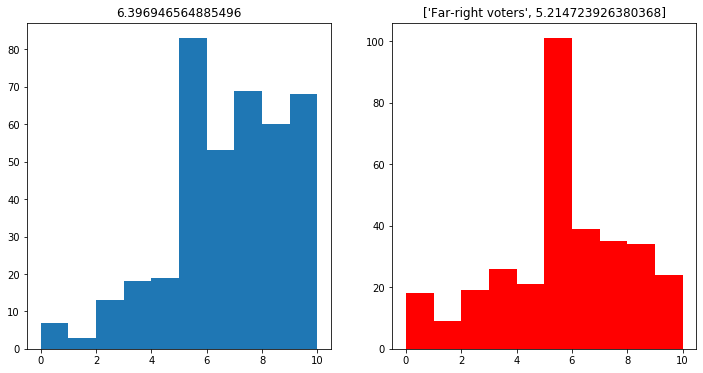

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nof['u_e_cul']);
axes[1].hist(pl_f['u_e_cul'], color='r');
axes[0].set_title(pl_nof['u_e_cul'].mean());
axes[1].set_title(['Far-right voters', pl_f['u_e_cul'].mean()]);

#### HU

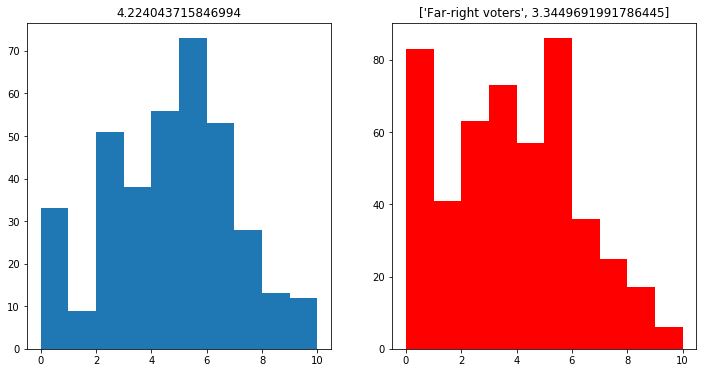

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_nof['u_e_cul']);
axes[1].hist(hu_f['u_e_cul'], color='r');
axes[0].set_title(hu_nof['u_e_cul'].mean());
axes[1].set_title(['Far-right voters', hu_f['u_e_cul'].mean()]);

### b_w_cou: Immigrants make country worse or better place to live
##### 0 (worse) - 10 (better), 77(refusal), 88(don´t know), 99(no answer)
#### DE

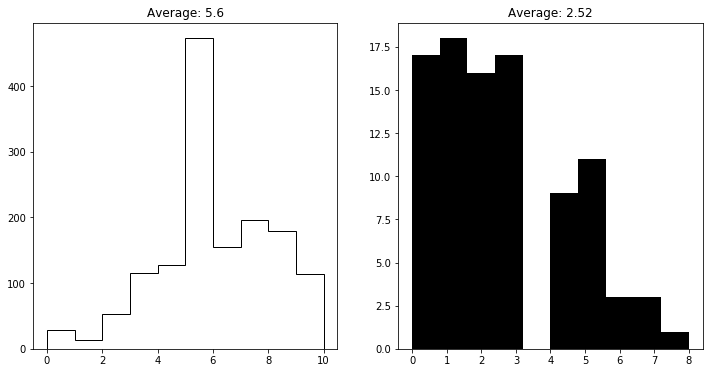

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_nof['b_w_cou'], color='black', histtype='step');
axes[1].hist(de_f['b_w_cou'], color='black');
axes[0].set_title(f"Average: {round(de_nof['b_w_cou'].mean(),2)}");
axes[1].set_title(f"Average: {round(de_f['b_w_cou'].mean(),2)}");
plt.savefig('../graphs/immigration_de.png')

In [67]:
de_f.shape

(95, 7)

In [70]:
de_f[de_f['b_w_cou']>=5].shape

(18, 7)

#### FR

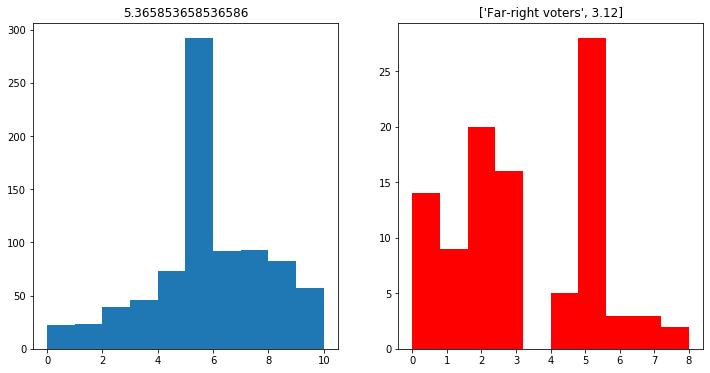

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_nof['b_w_cou']);
axes[1].hist(fr_f['b_w_cou'], color='r');
axes[0].set_title(fr_nof['b_w_cou'].mean());
axes[1].set_title(['Far-right voters', fr_f['b_w_cou'].mean()]);

#### IT

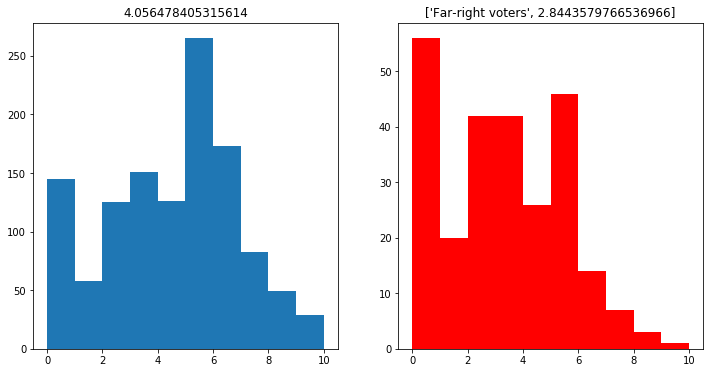

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_nof['b_w_cou']);
axes[1].hist(it_f['b_w_cou'], color='r');
axes[0].set_title(it_nof['b_w_cou'].mean());
axes[1].set_title(['Far-right voters', it_f['b_w_cou'].mean()]);

#### PL

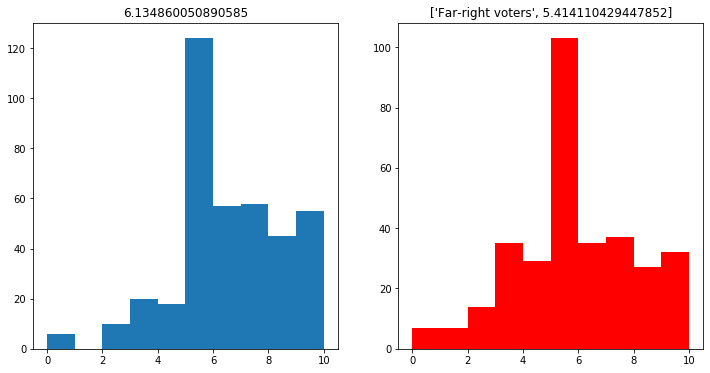

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nof['b_w_cou']);
axes[1].hist(pl_f['b_w_cou'], color='r');
axes[0].set_title(pl_nof['b_w_cou'].mean());
axes[1].set_title(['Far-right voters', pl_f['b_w_cou'].mean()]);

#### HU

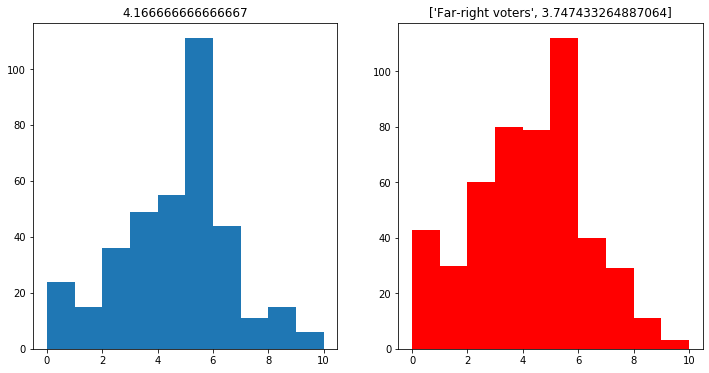

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_nof['b_w_cou']);
axes[1].hist(hu_f['b_w_cou'], color='r');
axes[0].set_title(hu_nof['b_w_cou'].mean());
axes[1].set_title(['Far-right voters', hu_f['b_w_cou'].mean()]);